In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from sqlalchemy import create_engine

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]

In [2]:
# Read data from sql to dataframe
eng = create_engine('sqlite:///db/data.sqlite3', echo=False)
df = pd.read_sql("select * from data", eng)
eng.dispose()

df.head(3)

,data_caption,data_category,data_creator,height,id,location_standard,meta_data_alto,meta_data_resize,meta_data_set_key,meta_data_subject_description,meta_data_subject_url,region_color,region_height,region_label,region_toolName,region_width,region_x,region_y,width,img_url_hash
0,REV. J. A. LONG Pronounced Invocation and Bene...,Photograph,,6414,59f0e2a52ef3300001002322,http://s3.amazonaws.com/ndnp-jpeg-surrogates/o...,http://s3.amazonaws.com/ndnp-batches/ohi_echo_...,1.000000,http://chroniclingamerica.loc.gov/lccn/sn88078...,"The Democratic banner. June 19, 1917. Page 5",http://chroniclingamerica.loc.gov/lccn/sn88078...,#fe0000,1034.922970,Illustration/Photo,rectangleTool,659.805304,267.935286,2123.434185,5188,2a083f026e508e09665b447bd7d5424a
1,JUDGE P. A. BERRY\nSelected By Governor Cox To...,Photograph,,6500,5b11aea6a042dd000100137b,http://s3.amazonaws.com/ndnp-jpeg-surrogates/o...,http://s3.amazonaws.com/ndnp-batches/ohi_echo_...,1.000000,http://chroniclingamerica.loc.gov/lccn/sn88078...,"The Democratic banner. June 08, 1917. Page 2",http://chroniclingamerica.loc.gov/lccn/sn88078...,#fe0000,1014.975042,Illustration/Photo,rectangleTool,662.231310,252.912460,2545.757072,5208,5112770122aabbb23e0891204687f756
2,"New photograph of Premier Venizelos of Greece,...",Photograph,Western Newspaper Union,6560,5b11ac5a572c860001003d6b,http://s3.amazonaws.com/ndnp-jpeg-surrogates/o...,http://s3.amazonaws.com/ndnp-batches/ohi_echo_...,1.000000,http://chroniclingamerica.loc.gov/lccn/sn88078...,"The Democratic banner. December 18, 1917. Page 1",http://chroniclingamerica.loc.gov/lccn/sn88078...,#fe0000,1440.479854,Illustration/Photo,rectangleTool,639.833057,1036.730931,2220.597210,5300,c3c1b1a08877725c59cdf76818fe14ef


In [3]:
df.shape

(1749, 20)

In [4]:
# Occurrence of categories for selected region
df.data_category.value_counts()

Photograph           1085
Illustration          358
Comics/Cartoon        208
Editorial Cartoon      68
Map                    16
                       14
Name: data_category, dtype: int64

In [5]:
# Occurence of n selected regions per image
reg_counts = df.img_url_hash.value_counts() # n of selections per image
reg_counts.value_counts().sort_index() # occurrence of n selections

1     737
2     202
3      80
4      27
5      11
6       6
7       7
8       2
9       3
10      2
11      3
12      2
Name: img_url_hash, dtype: int64

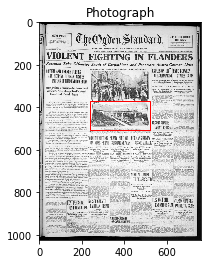

In [6]:
import matplotlib.patches as patches

# Display random image
row = df.sample(1).iloc[0]

# get image
imghash = row.img_url_hash
imgpath = 'images/{}.jpg'.format(imghash)
img = mpimg.imread(imgpath)

# calculate image scale -- downloaded images were rescaled from originals
actual_h = img.shape[0]
orig_h = row.height
size_ratio = actual_h / orig_h

# calculate scaled region coords
reg_x = np.rint(size_ratio * row.region_x).astype(int)
reg_y = np.rint(size_ratio * row.region_y).astype(int)
reg_w = np.rint(size_ratio * row.region_width).astype(int)
reg_h = np.rint(size_ratio * row.region_height).astype(int)

# plot image and selection area
fig, ax = plt.subplots()
ax.set_title(row.data_category)
ax.imshow(img, cmap='gray')
rect = patches.Rectangle((reg_x, reg_y), reg_w, reg_h, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

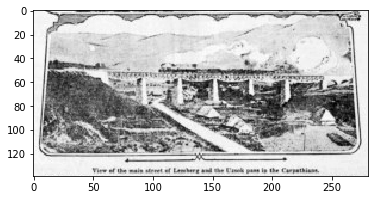

In [7]:
# Display the region
img2 = img[reg_y:(reg_y + reg_h), reg_x:(reg_x + reg_w)] # crop image
plt.imshow(img2, cmap='gray')
